In [ ]:
'''Here we are trying to find the logistic regression function for two datasets: newsgroup post, digits. 
Now we are interested in finding which method to find weights works best. We are employing probabilistic method 
with maximum likelihood. The essence of this method is to find the likelihood function and maximize this likelihood
function w.r.t the parameters.'''

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random

In [2]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix
from scipy import sparse
from scipy.sparse.linalg import inv

In [3]:
#one hot encoding for the y values n*m where m is the classes. 
def oneHot(Y):
    lowestValue = np.amin(Y)
    highestValue = np.amax(Y)
    y_oneHot = np.zeros((Y.shape[0], highestValue+1))
    y_oneHot[np.arange(Y.shape[0]),Y.transpose()] = 1

    return(y_oneHot)

In [4]:
def standardize( b ): #function for normalization. mean-variance method
    b = b.transpose() #b = N*M 
    a = np.empty( b.shape )
#     print(b.shape[0])
    for i in range(0,b.shape[0]):
        mean = np.mean(b[i,:])
#         print(mean)
        std = np.std(b[i,:])
        a[i,:] = (b[i,:]-mean)/std
#         print(a[i,:])
#         print(i)
        
    a = a.transpose()
    return a
    

In [5]:
def standardize2( b ): #function for normalization. min-max method
    b = b.transpose()
    a = np.empty( b.shape )
    i = 0
    for x in b:
        max = np.amax(x)
        min = np.amin(x)
        range = max - min
        if range == 0:
            a[i] = np.full( b[i].shape , 1 )
            i+=1
            continue
            
        a[i] = (b[i]-min)/range
        i+=1
    a = a.transpose()
    a[np.isnan(a)]=1
    return a

In [6]:
def error(X, Y, w):
    error = 0.0
    i = 0
    activation = np.exp(np.matmul(w[:,np.arange(K)].transpose(), X.transpose())) #10*n
    prediction = np.divide(activation[np.arange(K),:], np.sum(activation, axis=0))
#     print('prediction ' +str(prediction))
    classIndexValuesPrediction = np.argmax(prediction.transpose(), axis=1) #n*1 array
    print('prediction '+str(classIndexValuesPrediction.shape) +str(classIndexValuesPrediction))
    classIndexValuesY = np.argmax(Y, axis=1)
#     classIndexValuesY = 
    print('Y ' +str(classIndexValuesY))
    diff = classIndexValuesPrediction - classIndexValuesY
    
    print('dif '+str(diff))
    error = np.count_nonzero(diff)/len(diff)*100
#     error = np.sqrt(np.matmul(diff.transpose(),diff)/X.shape[0]) #RMSE error
    return error

In [10]:
'''Data preprocessing'''

#get the txt file into pandas
testData_pd = pd.read_csv('./dataSet/logistic_digits_test.txt', sep=',')
trainData_pd = pd.read_csv('./dataSet/logistic_digits_train.txt', sep=',')
trainData_pd = trainData_pd.loc[:, (trainData_pd != 0).any(axis=0)]
# print((trainData_pd != 0).any(axis=0))
# print((testData_pd != 0).any(axis=0))
testData_pd = testData_pd.loc[:, (testData_pd != 0).any(axis=0)]
testData_pd.insert(54,'additional',0)
print(testData_pd.head())

#convert it into a numpy array
testData = testData_pd.as_matrix()
trainData = trainData_pd.as_matrix()

#x-y split
x_train = trainData[:,:-1]
y_train = trainData[:,trainData.shape[1]-1]
y_train = np.reshape(y_train,(y_train.shape[0],1))
x_test = testData[:,:-1]
y_test = testData[:,testData.shape[1]-1]
y_test = np.reshape(y_test,(y_test.shape[0],1))

#one hot encoding
y_train = oneHot(y_train) #n*10 matrix 
y_test = oneHot(y_test)
print(max(x_train[:,10]),min(x_train[:,10]),np.mean(x_train[:,10]),np.std(x_train[:,10]))

#Standardizing the data 

x_train  = standardize2(x_train)
x_test  = standardize2(x_test)

y_train  = standardize2(y_train)
y_test  = standardize2(y_test)
print(max(x_train[:,1]),min(x_train[:,1]))


#getting the shape of the data
K = y_train.shape[1] #number of classes
N = y_train.shape[0] #number of datapoints
M = x_train.shape[1] #number of features

#Check
print(y_train.shape)
print(x_test.shape)
print(y_test)
print(K,N,M)



   X_test_ 1  X_test_ 3  X_test_ 4  X_test_ 5  X_test_ 6  X_test_ 7  \
0          1          0         10         16         14          2   
1          1          0          6         12         14          4   
2          1          0          0          7         16         16   
3          1          0          9         16         10          1   
4          1          0          3          8          9         11   

   X_test_ 8  X_test_ 9  X_test_10  X_test_11  ...  X_test_57  additional  \
0          0          0          0          0  ...          0           0   
1          0          0          0          2  ...          0           0   
2          7          0          0          0  ...          0           0   
3          0          0          0          0  ...          0           0   
4         14          1          0          0  ...          0           0   

   X_test_59  X_test_60  X_test_61  X_test_62  X_test_63  X_test_64  \
0          0         13          7     

/Users/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [7]:
'''Data preprocessing SECOND DATA SET'''

#get the txt file into pandas
testData_pd = pd.read_csv('./dataSet/logistic_news_test.txt', sep=',')
trainData_pd = pd.read_csv('./dataSet/logistic_news_train.txt', sep=',')

trainData_pd = trainData_pd.loc[:, (trainData_pd != 0).any(axis=0)]
testData_pd = testData_pd.loc[:, (testData_pd != 0).any(axis=0)]
trainData_pd = trainData_pd.loc[:, (trainData_pd != 1).any(axis=0)]
testData_pd = testData_pd.loc[:, (testData_pd != 1).any(axis=0)]
print(testData_pd.head())


#convert it into a numpy array
testData = testData_pd.as_matrix()
trainData = trainData_pd.as_matrix()

#x-y split
x_train = trainData[:,:-1]
y_train = trainData[:,trainData.shape[1]-1]
y_train = np.reshape(y_train,(y_train.shape[0],1))
x_test = testData[:,:-1]
y_test = testData[:,testData.shape[1]-1]
y_test = np.reshape(y_test,(y_test.shape[0],1))

# print(y_train)

#one hot encoding
y_train = oneHot(y_train.astype(int)) #n*10 matrix 
y_test = oneHot(y_test.astype(int))
# print(max(x_train[:,10]),min(x_train[:,10]),np.mean(x_train[:,10]),np.std(x_train[:,10]))

#Standardizing the data 
# x_train  = standardize2(x_train)
# x_test  = standardize2(x_test)

# y_train  = standardize2(y_train)
# y_test  = standardize2(y_test)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
# print(max(x_train[:,10]),min(x_train[:,10]))


#getting the shape of the data
K = y_train.shape[1] #number of classes
N = y_train.shape[0] #number of datapoints
M = x_train.shape[1] #number of features

#Check
print(y_train.shape)
print(x_test.shape)
print(K,N,M)
print(y_train)
print(x_train)



   X_test_   2  X_test_   3  X_test_   4  X_test_   5  X_test_   6  \
0     0.834782     0.234278    -0.017436    -0.047356    -0.067231   
1     0.852295     0.157635     0.057259    -0.236692     0.045507   
2     0.132996    -0.047609     0.028637    -0.015886    -0.016645   
3     0.742606     0.181835    -0.111287    -0.086347     0.118671   
4     0.135159    -0.017523     0.050122    -0.036126     0.054531   

   X_test_   7  X_test_   8  X_test_   9  X_test_  10  X_test_  11  ...  \
0    -0.011004    -0.021351     0.077255     0.025225    -0.070891  ...   
1    -0.000694    -0.042309    -0.043537    -0.097879     0.005942  ...   
2     0.023022     0.044999     0.033764    -0.001003    -0.013565  ...   
3     0.040703     0.021187    -0.055914    -0.188126     0.031402  ...   
4     0.033828     0.101636     0.045574     0.045485    -0.078620  ...   

   X_test_1993  X_test_1994   X_test_1995  X_test_1996  X_test_1997  \
0     0.000058    -0.000002 -5.127022e-05     0.000029   

/Users/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/Users/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


(12564, 20)
(6282, 2000)
20 12564 2000
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ 0.24901361 -0.23411713  0.63810881 ... -0.96095732  0.93795893
   0.00594843]
 [ 0.21079609  0.41709136  1.07435187 ... -0.49888072  1.0635867
   0.56255795]
 [ 0.23507249 -0.48874567 -0.92447417 ... -1.13592244 -0.64246661
   0.19691724]
 ...
 [ 0.89057997  0.55312225 -0.1236622  ... -3.15052909  1.68020196
   0.41804169]
 [ 0.45529925  0.89384238 -0.80992619 ... -0.14299188 -0.55969941
   0.33156614]
 [-0.16607043 -0.79716445  0.86396165 ...  0.32624338  1.32945974
   0.79379887]]


In [141]:
def gradientDescent():
    print ('***********Gradient Descent Method***********')
    
    #random initialization of weights in [0,1)
    

    w = np.zeros((M,K))


    #hardcoded parameters
    
#     numOfIters = 30
#     alpha = 100
    
    numOfIters = 200
    alpha = 1
    cost =[[]]*3

    
    #gradient descent 
    i=0
    while i<numOfIters:
        
        #vectorized to run in one loop

        grad = np.zeros((M,K))  #65*10

        activation = np.exp(np.matmul(w[:,np.arange(K)].transpose(), x_train.transpose())) #10*n     
        y_prediction = np.divide(activation[np.arange(K),:], np.sum(activation, axis=0)) #10*n
 
        grad = np.matmul((y_prediction.transpose()-y_train).transpose(),x_train)+1/N*w.transpose()
        grad = grad/N

        w = w-alpha*grad.transpose() #65*10
        
        cost[1].append(np.sum(-(np.multiply(np.log(y_prediction.transpose()), y_train))))
            


        i+=1
    
    fig, ax = plt.subplots()
    ax.scatter(range(0,i), cost[1], label='alpha = ' +str(alpha))
#     ax.plot(range(0,i), cost[:, 1] , label='Actual')
    ax.set_title('Gradient Descent for news dataset')
    ax.set_xlabel('Iterations') #: Use this if you want
    ax.set_ylabel('Cost')
    ax.grid()
    leg = ax.legend()
    plt.savefig('Gradient_Descent_for_news_dataset_with_4th_alpha_standardize2',dpi=300, bbox_inches='tight')
    plt.show()

    
    
#     print('The weight value is: \n'+str(w))
    print('Error is:', str(error(x_test , y_test ,w)))
    

***********Gradient Descent Method***********


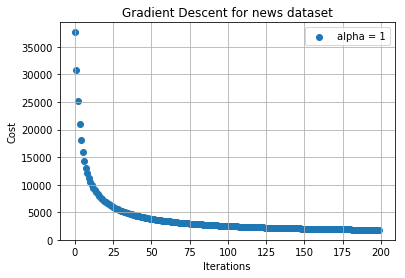

prediction (6282,)[15 18 15 ... 13  1 14]
Y [15 18  6 ... 13  1 14]
dif [0 0 9 ... 0 0 0]
Error is: 38.52276345113022


In [142]:
gradientDescent()

In [11]:
def newtonRaphson():
    print ('***********Newton Raphson Method***********')
    
    #random initialization of weights in [0,1)
    
    w = np.zeros((M,K)) #65*10
     
#     hessian[:,:] = np.(M,M)
#     print('weight ' + str(w.shape))
#     print('Hessian'+str(hessian))
    #hardcoded parameters
    
    numOfIters = 200
    cost = []
    
    #newton raphson
    t=0
    while t<numOfIters:
        
#         print("***********************************")
        print(str(t))
        #vectorized to run in one loop
        grad = np.zeros((M,K))  #65*10
        hessian = np.zeros((K,K,M,M))#a K*K matrix where every element is M*M

        activation = np.exp(np.matmul(w[:,np.arange(K)].transpose(), x_train.transpose())) #10*n     
        y_prediction = np.divide(activation[np.arange(K),:], np.sum(activation, axis=0)) #10*n

            
        constant = np.identity(K)
#         print("grad.shape"+str(np.matmul((y_prediction.transpose()-y_train).transpose(),x_train).shape))
#         print("w.shape "+str(w.transpose().shape))

        grad = np.matmul((y_prediction.transpose()-y_train).transpose(),x_train)+1/N*w.transpose()
        grad = grad/N
        
        for i in range(0,K):
            for j in range(0,K):
                print('hessian')
                print('i'+str(i)) 
                S = np.repeat(np.multiply(y_prediction[i,:],(constant[i,j]-y_prediction[j,:])),M,axis=0)
                S = S.reshape(M,N)
#                 print(S.shape)
                hessian[i,j] = np.matmul(np.multiply(S,x_train.transpose()),x_train)+constant[i,j]*(1/N)
#                 print(hessian[i,j])
#         print(hessian.shape())
        hessianInverse = np.linalg.inv(hessian)
        
#         print('hessianInverse'+str(hessianInverse))
        grad = grad.reshape(K,M) 
#         print("grad.shape"+str(grad))
#         print("hessianInverse*grad" + str(hessianInverse*grad))
        
#         w = w.reshape(K,1,M)
              
        hessianInverseGrad = np.zeros((K,1,M))
              
#         print(hessianInverseGrad.shape)
        
        for i in range(0,K):
              for j in range(0,K):
                print('hessianInverseGrad')
                print('i'+str(i))  
                hessianInverseGrad[i,0,:] = hessianInverseGrad[i,0,:] + np.matmul(hessianInverse[i][j],grad[j,:])
        
#         print(hessianInverseGrad)   
        hessianInverseGrad = hessianInverseGrad.reshape(M,K)
#       print(np.matmul(hessianInverse,grad).shape)
        w = w - 0.01*hessianInverseGrad
        t+=1
#         print("w " +str(t)+ str(w) )
        
#         w= w.reshape(M,K)
        
        
        
        
#         print(w.shape)
#         print(x_train.transpose().shape)

        
        cost.append(np.sum(-(np.multiply(np.log(y_prediction.transpose()), y_train))))
        
        
     
    fig, ax = plt.subplots()
    ax.scatter(range(0,t), cost[:], label='cost')
#     ax.plot(range(0,i), cost[:, 1] , label='Actual')
    ax.set_title('Gradient Descent for news dataset')
    ax.set_xlabel('Iterations') #: Use this if you want
    ax.set_ylabel('Cost')
    ax.grid()
    leg = ax.legend()
    plt.savefig('Newton Raphson for digits dataset ',dpi=300, bbox_inches='tight')
    plt.show()
    
#     print('The weight value is: \n'+str(w))
    print('Error is:', str(error(x_test , y_test ,w)))

***********Newton Raphson Method***********
0
hessian
i0
hessian
i0
hessian
i0
hessian
i0
hessian
i0
hessian
i0
hessian
i0
hessian
i0
hessian
i0
hessian
i0
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian


hessian
i0
hessian
i0
hessian
i0
hessian
i0
hessian
i0
hessian
i0
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9

hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0

hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0

hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0

hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1

hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0

hessian
i1
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0

hessian
i0
hessian
i0
hessian
i0
hessian
i0
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9

hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0

hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1

hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInv

hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInv

hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1

hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0

hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInv

hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInv

hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInv

hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInv

hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i3
hessianInverseGrad
i3

hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0

hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3

hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2

hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i4

hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i3

hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInv

hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3

hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInv

hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInv

hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3

hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInv

hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInv

hessian
i0
hessian
i0
hessian
i0
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9

hessian
i0
hessian
i0
hessian
i0
hessian
i0
hessian
i0
hessian
i0
hessian
i0
hessian
i0
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9

hessianInverseGrad
i4
hessianInverseGrad
i4
hessianInverseGrad
i4
hessianInverseGrad
i5
hessianInverseGrad
i5
hessianInverseGrad
i5
hessianInverseGrad
i5
hessianInverseGrad
i5
hessianInverseGrad
i5
hessianInverseGrad
i5
hessianInverseGrad
i5
hessianInverseGrad
i5
hessianInverseGrad
i5
hessianInverseGrad
i6
hessianInverseGrad
i6
hessianInverseGrad
i6
hessianInverseGrad
i6
hessianInverseGrad
i6
hessianInverseGrad
i6
hessianInverseGrad
i6
hessianInverseGrad
i6
hessianInverseGrad
i6
hessianInverseGrad
i6
hessianInverseGrad
i7
hessianInverseGrad
i7
hessianInverseGrad
i7
hessianInverseGrad
i7
hessianInverseGrad
i7
hessianInverseGrad
i7
hessianInverseGrad
i7
hessianInverseGrad
i7
hessianInverseGrad
i7
hessianInverseGrad
i7
hessianInverseGrad
i8
hessianInverseGrad
i8
hessianInverseGrad
i8
hessianInverseGrad
i8
hessianInverseGrad
i8
hessianInverseGrad
i8
hessianInverseGrad
i8
hessianInverseGrad
i8
hessianInverseGrad
i8
hessianInverseGrad
i8
hessianInverseGrad
i9
hessianInverseGrad
i9
hessianInv

hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i4
hessianInverseGrad
i4
hessianInverseGrad
i4
hessianInverseGrad
i4
hessianInverseGrad
i4
hessianInv

hessian
i0
hessian
i0
hessian
i0
hessian
i0
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9

hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInv

hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInv

hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInv

hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInv

hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInv

hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInv

hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1

hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInv

hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInv

hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInv

hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInv

hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i1
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInv

hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInv

hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInv

hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInv

hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2

hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInv

hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInv

hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3

hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0

hessian
i2
hessian
i2
hessian
i2
hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInv

hessian
i2
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0

hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2

hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2

hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2

hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i3
hessianInverseGrad
i4
hessianInverseGrad
i4
hessianInverseGrad
i4
hessianInverseGrad
i4
hessianInv

hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1

hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i3
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i4
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i5
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i6
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i7
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i8
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessian
i9
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInv

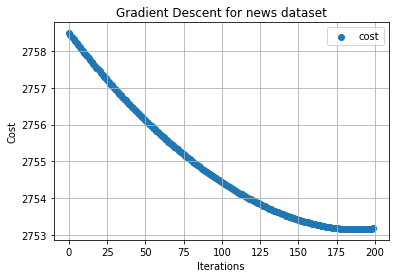

prediction (599,)[0 8 7 0 8 3 3 5 8 7 7 3 7 8 8 8 7 8 7 8 3 5 3 3 8 3 7 8 7 8 0 5 7 8 8 7 3
 3 8 0 7 7 7 3 8 3 8 3 8 0 8 3 0 7 7 7 3 8 8 7 8 8 8 3 7 5 3 3 3 8 7 0 8 7
 3 7 5 8 7 8 7 8 0 8 8 0 0 8 0 7 8 0 8 8 7 3 3 8 7 7 7 8 3 7 3 8 5 8 7 8 3
 3 8 7 5 7 7 0 8 8 7 0 5 8 7 3 5 0 0 7 7 0 8 7 3 0 7 7 7 7 8 7 8 0 5 7 7 0
 8 8 3 7 8 7 3 8 8 7 8 8 8 3 0 7 3 8 7 3 7 5 7 7 8 8 7 0 3 0 7 8 3 8 7 7 7
 8 3 8 8 8 7 0 7 3 7 8 0 8 3 8 3 3 5 7 0 8 5 7 5 8 8 8 8 8 3 3 7 7 8 7 0 7
 8 8 7 3 3 3 8 8 5 7 7 7 7 8 7 8 7 7 7 7 8 7 0 7 8 3 0 8 3 8 3 7 7 3 3 8 3
 7 7 5 7 7 3 7 0 3 7 3 7 7 7 8 0 7 8 0 0 7 3 0 8 0 3 7 7 7 7 8 8 7 7 0 3 7
 3 8 1 8 8 5 3 7 8 0 7 7 7 0 7 7 5 8 8 3 3 3 8 3 7 7 7 7 7 8 7 0 3 7 0 7 7
 3 8 7 3 7 8 3 7 8 8 7 3 3 7 3 0 0 8 8 3 7 3 8 0 3 8 7 7 8 8 3 8 3 5 7 7 7
 3 7 0 0 3 0 0 7 7 7 0 3 8 0 3 5 0 8 8 7 7 3 3 7 8 5 8 3 3 3 7 3 7 7 7 7 7
 5 7 8 0 7 3 8 7 3 8 8 8 5 8 5 0 8 7 7 8 7 3 0 7 7 7 3 3 8 8 0 7 0 7 0 5 5
 7 8 7 0 7 3 0 8 8 8 7 3 8 7 7 8 8 3 8 7 0 0 7 8 5 0 5 5 7 8 3 7 7 8 5 0 7
 8 5 8 7

In [12]:
newtonRaphson()

In [105]:
def stochasticGradientDescent():
    print ('***********Gradient Descent Method***********')
    
    #random initialization of weights in [0,1)
    

    w = np.zeros((M,K))
 
    #hardcoded parameters
    
    numOfIters = 15
#     alpha = 200
    
    cost = []
    batchsize = N-1
    #gradient descent 
    i=0
   
    while i<numOfIters:
        
        alpha = [200,100,100,14,13,13,8,8,8,3,3,3,1,1,1]
        
        index = random.sample(range(0, N-1),batchsize)
        #vectorized to run in one loop
#         print(index)
        
        x_train_sgd = x_train[index,:]
        y_train_sgd = y_train[index,:]
        
        grad = np.zeros((M,K))  #65*10

        activation = np.exp(np.matmul(w[:,np.arange(K)].transpose(), x_train_sgd.transpose())) #10*n     
        y_prediction = np.divide(activation[np.arange(K),:], np.sum(activation, axis=0)) #10*n
 
        grad = np.matmul((y_prediction.transpose()-y_train_sgd).transpose(),x_train_sgd)+1/N*w.transpose()
        grad = grad/N
#         print("grad"+str(grad))

        w = w-alpha[i]*grad.transpose() #65*10
        
        cost.append(np.sum(-(np.multiply(np.log(y_prediction.transpose()), y_train_sgd))))
        
        i+=1
        
        
    
    fig, ax = plt.subplots()
    ax.scatter(range(0,i), cost[:], label='alpha = ' +str(alpha)+' batchsize =' +str(batchsize))
#     ax.plot(range(0,i), cost[:, 1] , label='Actual')
#     ax.set_title('Gradient Descent for news dataset')
    ax.set_xlabel('Iterations') #: Use this if you want
    ax.set_ylabel('Cost')
    ax.grid()
    leg = ax.legend()
    plt.savefig('Stochastic_Gradient_Descent_for_newsts_dataset_with_variable_alpha_batchsize_N',dpi=300, bbox_inches='tight')
    plt.show()
    
#     print('The weight value is: \n'+str(w))
    print('Error is:', str(error(x_test , y_test ,w)))
#     print('Error is:', str(error(x_test , y_test ,w))) 

***********Gradient Descent Method***********


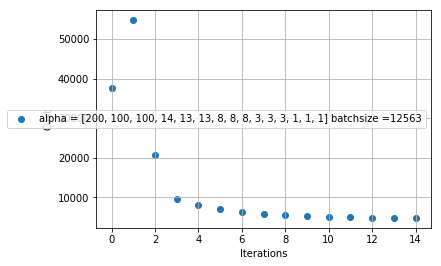

prediction (6282,)[15 18  6 ... 13  1 14]
Y [15 18  6 ... 13  1 14]
dif [0 0 0 ... 0 0 0]
Error is: 33.03088188475008


In [106]:
stochasticGradientDescent()

In [116]:

def miniBatchStochasticGradientDescent():
    print ('***********Gradient Descent Method***********')
    
    #random initialization of weights in [0,1)
    

    w = np.zeros((M,K))
 
    #hardcoded parameters
    
    numOfIters = 100
    alpha = 1
    
    cost = []
    batchsize = 2000
    #gradient descent 
    i=0
   
    while i<numOfIters:
        
#         alpha = [4,3,3,2,2,2,2,2,2,1,1,1,0.1,0.1,0.1]
        
        index = random.sample(range(0, N-1),batchsize)
        #vectorized to run in one loop
#         print(index)
        
        x_train_sgd = x_train[index,:]
        y_train_sgd = y_train[index,:]
        
        grad = np.zeros((M,K))  #65*10

        activation = np.exp(np.matmul(w[:,np.arange(K)].transpose(), x_train_sgd.transpose())) #10*n     
        y_prediction = np.divide(activation[np.arange(K),:], np.sum(activation, axis=0)) #10*n
 
        grad = np.matmul((y_prediction.transpose()-y_train_sgd).transpose(),x_train_sgd)+1/N*w.transpose()
        grad = grad/N
#         print("grad"+str(grad))

        w = w-alpha*grad.transpose() #65*10
        
        cost.append(np.sum(-(np.multiply(np.log(y_prediction.transpose()), y_train_sgd))))
        
        i+=1
        
        
    
    fig, ax = plt.subplots()
    ax.scatter(range(0,i), cost[:], label='alpha = ' +str(alpha)+' batchsize =' +str(batchsize))
#     ax.plot(range(0,i), cost[:, 1] , label='Actual')
#     ax.set_title('Gradient Descent for news dataset')
    ax.set_xlabel('Iterations') #: Use this if you want
    ax.set_ylabel('Cost')
    ax.grid()
    leg = ax.legend()
    plt.savefig('Mini_Batch_Stochastic_Gradient_Descent_for_newsts_dataset_with_2nd_alpha_batchsize_2000',dpi=300, bbox_inches='tight')
    plt.show()
    
#     print('The weight value is: \n'+str(w))
    print('Error is:', str(error(x_test , y_test ,w)))
#     print('Error is:', str(error(x_test , y_test ,w))) 


***********Gradient Descent Method***********


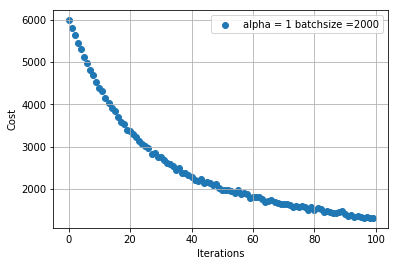

prediction (6282,)[15 18  6 ... 13  1 14]
Y [15 18  6 ... 13  1 14]
dif [0 0 0 ... 0 0 0]
Error is: 33.651703279210444


In [117]:
miniBatchStochasticGradientDescent()

In [136]:
def momentumMethod():
    print ('***********Gradient Descent Method***********')
    
    #random initialization of weights in [0,1)
    

    w = np.zeros((M,K))
    wPrev = np.zeros((M,K))
    wNext = np.zeros((M,K))
    
    #hardcoded parameters
    
    numOfIters = 20
    alpha = .001
    cost = []
    beta = 0.5
    #gradient descent 
    i=0
    while i<numOfIters:
        
        #vectorized to run in one loop

        grad = np.zeros((M,K))  #65*10

        activation = np.exp(np.matmul(w[:,np.arange(K)].transpose(), x_train.transpose())) #10*n     
        y_prediction = np.divide(activation[np.arange(K),:], np.sum(activation, axis=0)) #10*n
 
        grad = np.matmul((y_prediction.transpose()-y_train).transpose(),x_train)+1/N*w.transpose()
        
#         print("grad"+str(grad))
        
        wNext = w-alpha*grad.transpose()+beta*(w-wPrev)#65*10
    
#         print(w-wPrev)
        wPrev = np.copy(w)
        w = wNext
        
        
        cost.append(np.sum(-(np.multiply(np.log(y_prediction.transpose()), y_train))))
        
        i+=1
        
        
    
    fig, ax = plt.subplots()
    ax.scatter(range(0,i), cost[:], label='alpha = ' +str(alpha)+' beta = '+str(beta))
#     ax.plot(range(0,i), cost[:, 1] , label='Actual')
    ax.set_title('Gradient Descent for news dataset')
    ax.set_xlabel('Iterations') #: Use this if you want
    ax.set_ylabel('Cost')
    ax.grid()
    leg = ax.legend()
    plt.savefig('Momentum Method with Gradient Descent for news dataset with 2nd alpha ',dpi=300, bbox_inches='tight')
    plt.show()
#     print('The weight value is: \n'+str(w))
    print('Error is:', str(error(x_test , y_test ,w)))
#     print('Error is:', str(error(x_test , y_test ,w))) 

***********Gradient Descent Method***********


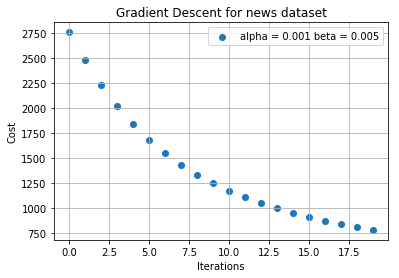

prediction (599,)[7 9 1 3 5 8 9 9 5 6 1 7 2 7 0 3 1 9 6 8 2 9 8 3 7 7 1 5 2 9 9 9 1 8 7 1 0
 3 9 8 2 6 2 8 2 3 8 9 5 5 5 5 3 1 4 4 0 2 7 2 7 8 3 3 1 0 5 1 8 5 4 3 5 0
 8 1 4 0 4 8 6 9 7 0 7 3 2 2 3 6 0 2 7 5 6 8 9 7 4 7 0 5 7 1 0 5 5 5 4 7 9
 2 8 1 9 1 2 2 0 9 4 8 0 8 7 2 5 7 8 1 4 3 2 7 5 9 1 8 1 4 7 1 5 1 6 6 1 3
 0 9 1 6 8 1 7 5 0 6 0 1 7 5 9 2 8 7 0 7 8 6 6 6 9 9 8 8 8 4 2 3 7 5 4 7 6
 0 8 0 5 7 1 2 4 3 2 8 5 8 9 8 7 9 0 6 2 2 0 6 9 9 7 8 2 5 7 9 6 4 9 2 3 4
 5 5 6 2 2 8 5 7 0 1 6 4 6 9 4 8 1 8 1 8 0 4 9 1 5 5 3 0 7 2 3 6 1 3 7 5 3
 0 8 0 1 6 3 1 3 2 2 2 6 4 2 0 3 2 5 7 2 1 7 5 9 3 7 6 2 6 4 5 9 6 6 9 7 6
 7 2 2 8 8 0 2 4 8 9 6 1 4 8 9 8 0 5 5 5 2 7 7 5 2 1 6 6 6 9 4 3 7 4 2 6 6
 0 5 4 7 6 4 0 6 5 7 4 9 5 9 7 2 5 7 5 7 1 9 8 9 7 7 4 6 4 5 3 5 3 0 5 4 1
 7 4 3 3 5 5 3 4 1 2 5 8 8 2 0 0 9 0 2 6 4 3 0 6 7 0 9 5 3 8 0 7 2 6 8 1 6
 6 6 1 3 4 3 5 4 7 0 0 7 3 7 0 3 9 6 6 9 6 3 1 6 4 4 0 9 5 9 8 4 3 8 3 0 0
 2 0 4 5 0 0 9 5 7 4 6 6 9 4 1 9 7 3 9 7 5 1 6 7 0 5 6 6 6 7 5 4 1 8 9 9 4
 7 5 4 6

In [137]:
momentumMethod()

In [128]:
def stochasticGradientDescentWithMomentum():
    print ('***********Gradient Descent Method***********')
    
    #random initialization of weights in [0,1)
    

    w = np.zeros((M,K))
    wPrev = np.zeros((M,K))
    wNext = np.zeros((M,K))
 
    #hardcoded parameters
    
    numOfIters = 100
    alpha = 1
    beta = 0.5
    
    cost = []
    batchsize = N-1
    #gradient descent 
    i=0
   
    while i<numOfIters:
        
#         alpha = [4,3,3,2,2,2,2,2,2,1,1,1,0.1,0.1,0.1]
        
        index = random.sample(range(0, N-1),batchsize)
        #vectorized to run in one loop
#         print(index)
        
        x_train_sgd = x_train[index,:]
        y_train_sgd = y_train[index,:]
        
        grad = np.zeros((M,K))  #65*10

        activation = np.exp(np.matmul(w[:,np.arange(K)].transpose(), x_train_sgd.transpose())) #10*n     
        y_prediction = np.divide(activation[np.arange(K),:], np.sum(activation, axis=0)) #10*n
 
        grad = np.matmul((y_prediction.transpose()-y_train_sgd).transpose(),x_train_sgd)+1/N*w.transpose()
        grad = grad/N
#         print("grad"+str(grad))

        wNext = w-alpha*grad.transpose()+beta*(w-wPrev)#65*10
    
#         print(w-wPrev)
        wPrev = np.copy(w)
        w = wNext
        
        cost.append(np.sum(-(np.multiply(np.log(y_prediction.transpose()), y_train_sgd))))
        
        i+=1
        
        
    
    fig, ax = plt.subplots()
    ax.scatter(range(0,i), cost[:], label='alpha = ' +str(alpha)+' beta = '+str(beta)+' batchsize = '+str(batchsize))
#     ax.plot(range(0,i), cost[:, 1] , label='Actual')
    ax.set_title('Gradient Descent for news dataset')
    ax.set_xlabel('Iterations') #: Use this if you want
    ax.set_ylabel('Cost')
    ax.grid()
    leg = ax.legend()
    plt.savefig('Momentum_Method_with_Stochastic_Gradient_Descent_for_news_dataset_with_4th_beta_and_fixed alpha ',dpi=300, bbox_inches='tight')
    plt.show()
    
#     print('The weight value is: \n'+str(w))
    print('Error is:', str(error(x_test , y_test ,w)))
#     print('Error is:', str(error(x_test , y_test ,w))) 

***********Gradient Descent Method***********


/Users/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
/Users/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in multiply
/Users/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


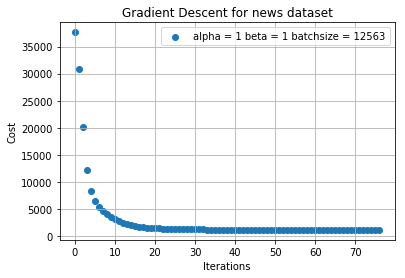

prediction (6282,)[0 0 0 ... 0 0 0]
Y [15 18  6 ... 13  1 14]
dif [-15 -18  -6 ... -13  -1 -14]
Error is: 95.63833174148361


In [129]:
stochasticGradientDescentWithMomentum()

In [8]:
def newtonRaphsonSparse():
    print ('***********Newton Raphson Method***********')
    
    #random initialization of weights in [0,1)
    
    w = np.zeros((M,K)) #65*10
     
#     hessian[:,:] = np.(M,M)
#     print('weight ' + str(w.shape))
#     print('Hessian'+str(hessian))
    #hardcoded parameters
    
    numOfIters = 5
    cost = []
    
    #newton raphson
    t=0
    while t<numOfIters:
        
#         print("***********************************")
        print(str(t))
        #vectorized to run in one loop
        grad = np.zeros((M,K))  #65*10
        hessian = np.zeros((K,K,M,M))#a K*K matrix where every element is M*M

        activation = np.exp(np.matmul(w[:,np.arange(K)].transpose(), x_train.transpose())) #10*n     
        y_prediction = np.divide(activation[np.arange(K),:], np.sum(activation, axis=0)) #10*n

            
        constant = np.identity(K)
#         print("grad.shape"+str(np.matmul((y_prediction.transpose()-y_train).transpose(),x_train).shape))
#         print("w.shape "+str(w.transpose().shape))

        grad = np.matmul((y_prediction.transpose()-y_train).transpose(),x_train)+1/N*w.transpose()
        grad = grad/N
        
        for i in range(0,K):
            for j in range(0,K):
#                 print('hessian')
#                 print('i'+str(i)) 
                
#                 S = (np.multiply(,),M,axis=0)
                S = np.repeat(sparse.csr_matrix(y_prediction[i,:]).multiply(sparse.csr_matrix((constant[i,j]-y_prediction[j,:]))).todense(),M,axis=0)
                S = S.reshape(M,N)
#                 print(S.shape)
                hessian[i,j] = np.matmul(np.multiply(S,x_train.transpose()),x_train)+constant[i,j]*(1/N)
#                 hessian[i,j] = np.multiply(S,sparse.csr_matrix(x_train.transpose())@(sparse.csr_matrix(x_train)).todense())+constant[i,j]*(1/N)
#                 print(hessian[i,j])
#         print(hessian.shape())
        print("hessianInverse")
#         hessianInverse = np.linalg.inv(hessian)

        hessianInverse = np.zeros((K,K,M,M))
        for i in range(0,K):
            for j in range(0,K):
                    hessianInverse[i,j] = inv(sparse.csr_matrix(hessian[i,j])).todense()
        print('hessianInverse'+str(hessianInverse))
        grad = grad.reshape(K,M) 
#         print("grad.shape"+str(grad))
#         print("hessianInverse*grad" + str(hessianInverse*grad))
        
#         w = w.reshape(K,1,M)
              
        hessianInverseGrad = np.zeros((K,1,M))
              
#         print(hessianInverseGrad.shape)
        
        for i in range(0,K):
              for j in range(0,K):
                print('hessianInverseGrad')
                print('i'+str(i))  
                hessianInverseGrad[i,0,:] = hessianInverseGrad[i,0,:] + np.matmul(hessianInverse[i][j],grad[j,:])
        
#         print(hessianInverseGrad)   
        hessianInverseGrad = hessianInverseGrad.reshape(M,K)
#       print(np.matmul(hessianInverse,grad).shape)
        w = w - 0.01*hessianInverseGrad
        t+=1
#         print("w " +str(t)+ str(w) )
        
#         w= w.reshape(M,K)
        
        
        
        
#         print(w.shape)
#         print(x_train.transpose().shape)

        
        cost.append(np.sum(-(np.multiply(np.log(y_prediction.transpose()), y_train))))
        
        
     
    fig, ax = plt.subplots()
    ax.scatter(range(0,t), cost[:], label='cost')
#     ax.plot(range(0,i), cost[:, 1] , label='Actual')
    ax.set_title('Gradient Descent for news dataset')
    ax.set_xlabel('Iterations') #: Use this if you want
    ax.set_ylabel('Cost')
    ax.grid()
    leg = ax.legend()
    plt.savefig('Newton Raphson for digits dataset ',dpi=300, bbox_inches='tight')
    plt.show()
    
#     print('The weight value is: \n'+str(w))
    print('Error is:', str(error(x_test , y_test ,w)))

***********Newton Raphson Method***********
0
hessianInverse
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i1
hessianInverseGrad
i2
hessianInverseGrad
i2
hessianInverseG

hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i19
hessianInverseGrad
i19
hessianInverseGrad
i19
hessianInverseGrad
i19
hessianInverseGrad
i19
hessianInverseGrad
i19
hessianInverseGrad
i19
hessianInverseGrad
i19
hessianInverseGrad
i19
hessianInverseGrad
i19
hessianInverseGrad
i19
hessianInverseGrad
i19
hessianInverseGrad
i19
hessianInverseGrad
i19
hessianInverseGrad
i19
hessianInverseGrad
i19
hessianInverseGrad
i19
hessianInverseGrad
i19
hessianInverseGrad
i19
hessianInverseGrad
i19
1
hessianInverse
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0
hessianInverseGrad
i0


hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i17
hessianInverseGrad
i17
hessianInverseGrad
i17
hessianInverseGrad
i17
hessianInverseGrad
i17
hessianInverseGrad
i17
hessianInverseGrad
i17
hessianInverseGrad
i17
hessianInverseGrad
i17
hessianInverseGrad
i17
hessianInverseGrad
i17
hessianInverseGrad
i17
hessianInverseGrad
i17
hessianInverseGrad
i17
hessianInverseGrad
i17
hessianInverseGrad
i17
hessianInverseGrad
i17
hessianInverseGrad
i17
hessianInverseGrad
i17
hessianInverseGrad
i17
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInverseGrad
i18
hessianInve

hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInverseGrad
i16
hessianInve

hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i14
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInverseGrad
i15
hessianInve

hessianInverseGrad
i11
hessianInverseGrad
i11
hessianInverseGrad
i11
hessianInverseGrad
i11
hessianInverseGrad
i11
hessianInverseGrad
i11
hessianInverseGrad
i11
hessianInverseGrad
i11
hessianInverseGrad
i11
hessianInverseGrad
i11
hessianInverseGrad
i11
hessianInverseGrad
i11
hessianInverseGrad
i11
hessianInverseGrad
i12
hessianInverseGrad
i12
hessianInverseGrad
i12
hessianInverseGrad
i12
hessianInverseGrad
i12
hessianInverseGrad
i12
hessianInverseGrad
i12
hessianInverseGrad
i12
hessianInverseGrad
i12
hessianInverseGrad
i12
hessianInverseGrad
i12
hessianInverseGrad
i12
hessianInverseGrad
i12
hessianInverseGrad
i12
hessianInverseGrad
i12
hessianInverseGrad
i12
hessianInverseGrad
i12
hessianInverseGrad
i12
hessianInverseGrad
i12
hessianInverseGrad
i12
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInverseGrad
i13
hessianInve

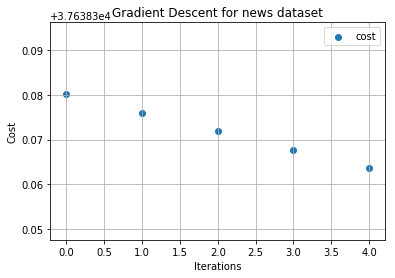

prediction (6282,)[16 12 13 ... 12  3  3]
Y [15 18  6 ... 13  1 14]
dif [  1  -6   7 ...  -1   2 -11]
Error is: 95.04934734161095


In [9]:
newtonRaphsonSparse()